In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from scipy.stats import multivariate_normal
from GMM import GMM
import warnings
warnings.filterwarnings("ignore")

In [2]:
N = 13000           # загальна кількість деталей
n1 = 8000           # кількість деталей, виготовлених на першому заводі
n2 = 5000           # кількість деталей, виготовлених на другому заводі
m1 = 13             # вага виробів на першому заводі
m2 = 12             # вага виробів на другому заводі
sigma1 = 0.5        # стандартне відхилення виробів першого заводу
sigma2 = 0.7        # стандартне відхилення виробів другого заводу
theta1 = 0.85       # ймовірність отримання якісного виробу першого заводу
theta2 = 0.8        # ймовірність отримання якісного виробу другого заводу
max_iter = 1000     # кількість ітерацій для роботи алгоритму
tolerance = 0.0001  # точніть методу

# Згенеруємо виборки випадкових величин згідно умов завдання
x1 = np.random.normal(m1, sigma1, n1)   
x2 = np.random.normal(m2, sigma2, n2)
x=np.hstack([x1, x2])    # об'єднаємо виборки в одну

In [3]:
x1

array([12.48191121, 13.39974555, 13.06172695, ..., 12.4365382 ,
       12.94658465, 13.06717381])

In [4]:
x2

array([12.23262442, 11.52901021, 12.62121677, ..., 12.53761701,
       11.71269749, 13.18473133])

In [5]:
data = np.concatenate((x), axis = None)
data

array([12.48191121, 13.39974555, 13.06172695, ..., 12.53761701,
       11.71269749, 13.18473133])

In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

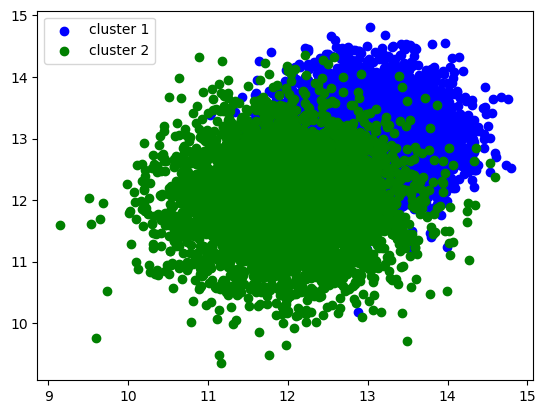

In [7]:
x1, y1 = make_blobs(8000, centers=1, cluster_std=0.5, center_box=(13,13))
x2, y2 = make_blobs(5000, centers=1, cluster_std=0.7, center_box=(12,12))
plt.scatter(x1[:, 0], x1[:, 1], color='blue', label='cluster 1')
plt.scatter(x2[:, 0], x2[:, 1], color='green', label='cluster 2')
plt.legend()
plt.show()

In [7]:
gm = GaussianMixture(n_components=2).fit(x.reshape(-1, 1))
gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 2,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [9]:
centers = gm.means_
print(centers)

[[11.89366246]
 [13.00782611]]


In [25]:
pred = gm.predict(x.reshape(-1, 1))

In [11]:
plant1 = list(pred).count(0)/13000
plant2 = list(pred).count(1)/13000
print(f'Ймовірність, що деталь з першого заводу = {plant1}')
print(f'Ймовірність, що деталь з другого заводу = {plant2}')

Ймовірність, що деталь з першого заводу = 0.7014615384615385
Ймовірність, що деталь з другого заводу = 0.29853846153846153
